In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
# load the appliances energy prediction data set

data = pd.read_csv('energydata_complete.csv')

data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
# check maximun and minimum dates
data['date'].agg(['min', 'max'])

min    2016-01-11 17:00:00
max    2016-05-27 18:00:00
Name: date, dtype: object

In [4]:
# check the data type of the date variable
data['date'].dtypes

dtype('O')

In [5]:
# extract datetime derived features

# parse as datetime data type
data['date'] = pd.to_datetime(data['date'])

# new feature names
cols = ['day', 'month', 'hr']

# create the date and time features
data[cols] = pd.DataFrame([(x.day, x.month, x.hour) for x in data['date']])

data[['date', 'Appliances', 'lights'] + cols].head()

,date,Appliances,lights,day,month,hr
0,2016-01-11 17:00:00,60,30,11,1,17
1,2016-01-11 17:10:00,60,30,11,1,17
2,2016-01-11 17:20:00,50,30,11,1,17
3,2016-01-11 17:30:00,50,40,11,1,17
4,2016-01-11 17:40:00,60,40,11,1,17


In [6]:
# inspect month
data['month'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [7]:
# make the datetime variable the index of the series

data.index = data['date']

Text(0.5, 1.0, 'Daily Cycle of Energy Consumption by Appliances')

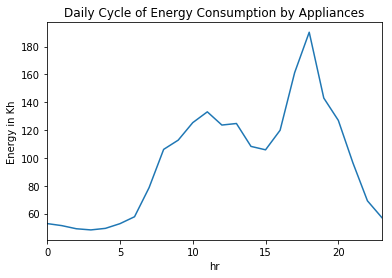

In [8]:
# Explore mean energy consumption by appliances
# per hr of the day throughout the 5 months

data.groupby('hr')['Appliances'].mean().plot()
plt.ylabel('Energy in Kh')
plt.title('Daily Cycle of Energy Consumption by Appliances')

During the night, where there is no human activity, there is a baseline energy consumption of about less than 60 Wh. We will use that value later on as the minimum value for the peaks.

Text(0.5, 1.0, 'Mean daily Energy Consumption')

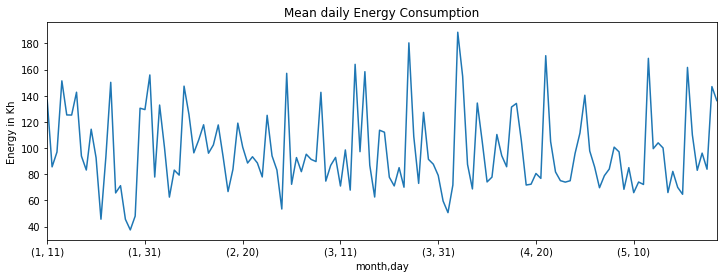

In [9]:
# Plot mean energy consumption by appliances per day
# throughout the 5 months

# we are going to work with this data

data.groupby(['month', 'day'])['Appliances'].mean().plot(figsize=(12, 4))
plt.ylabel('Energy in Kh')
plt.title('Mean daily Energy Consumption')

In [10]:
# create a pandas series with the mean energy consumed by appliances
# per day throughout the 5 months

daily_ec = data.groupby(['month', 'day'])['Appliances'].mean()

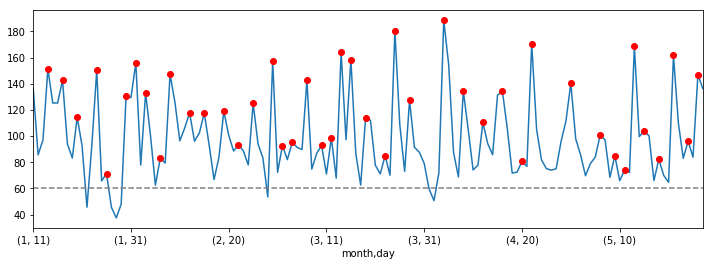

In [11]:
# Determine the days of peak electricity consumption
# throughout the 5 months
# that is, find the local maxima

# find the peaks (local maxima)
# returns an array with the location of the maxima in the pandas
# series
peaks, _ = find_peaks(daily_ec, height=60)

# plot the peaks
#---------------
plt.figure(figsize=(12, 4))

# plot the time series with the mean energy consumed per day
daily_ec.plot()

# Overlay on top of the time series a series of red dots,
# at the location of the local maxima, using the peak variable
# for the x coordinate and the value of the peak for the y coordinate
plt.plot(peaks, daily_ec.values[peaks], "o", color='red')

# add a line at the baseline electricity consumption of 60 Kh
plt.plot(np.full_like(daily_ec, 60), "--", color="gray")

# display the plot
plt.show()

In [12]:
# peaks contains the indeces of the array
# with the days of maximum electricity consumption
peaks

array([  3,   6,   9,  13,  15,  19,  21,  23,  26,  28,  32,  35,  39,
        42,  45,  49,  51,  53,  56,  59,  61,  63,  65,  68,  72,  74,
        77,  84,  88,  92,  96, 100, 102, 110, 116, 119, 121, 123, 125,
       128, 131, 134, 136], dtype=int64)

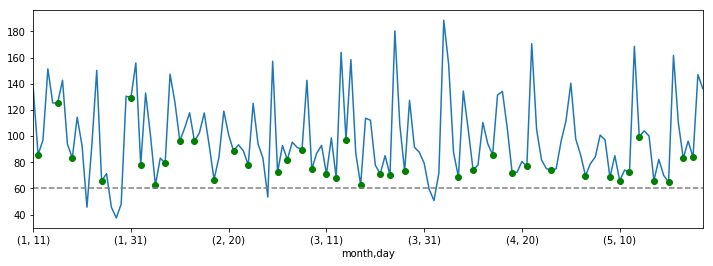

In [13]:
# determine the days of minimum electricity consumption
# throughout the 5 months
# that is, the local minima

# we use the same function, find_peaks, which means that we need to 
# turn the time series upside-dowm, which we do with the reciprocal function
valleys, _ = find_peaks(1 / daily_ec, height=(0, 1/60))

# plot the local minima
plt.figure(figsize=(12, 4))

# plot the time series with the mean energy consumed per day
daily_ec.plot()

# Overlay on top of the time series a series of green dots,
# at the location of the local minima, using the valleys variable
# for the x coordinate and the value of the local minima for the y coordinate
plt.plot(valleys, daily_ec.values[valleys], "o", color='green')

# add a line at the baseline electricity consumption
plt.plot(np.full_like(daily_ec, 60), "--", color="gray")
plt.show()

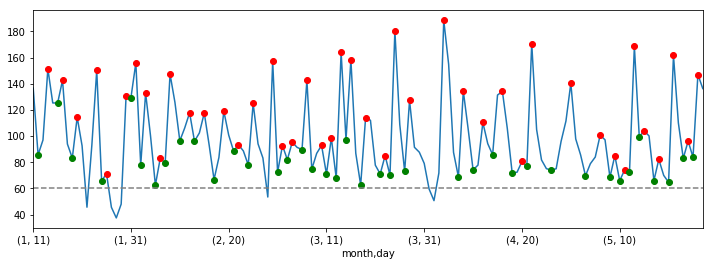

In [14]:
# now, let's determine both local minima and maxima
# and overlay them in a plot

peaks, _ = find_peaks(daily_ec, height=60)
valleys, _ = find_peaks(1 / daily_ec, height=(0, 1/60))

plt.figure(figsize=(12, 4))
daily_ec.plot()
plt.plot(peaks, daily_ec.values[peaks], "o", color='red')
plt.plot(valleys, daily_ec.values[valleys], "o", color='green')
plt.plot(np.full_like(daily_ec, 60), "--", color="gray")
plt.show()

## There is more

What if we have more than one instance, for example, various customers with multiple time-series?

In [15]:
import featuretools as ft

# let's load the example data set from feature tools
data_dict = ft.demo.load_mock_customer()

data = data_dict["transactions"].merge(
    data_dict["sessions"]).merge(data_dict["customers"])

cols = ['customer_id',
        'transaction_id',
        'transaction_time',
        'amount',
        ]

data = data[cols]

data.head()

,customer_id,transaction_id,transaction_time,amount
0,2,298,2014-01-01 00:00:00,127.64
1,2,2,2014-01-01 00:01:05,109.48
2,2,308,2014-01-01 00:02:10,95.06
3,2,116,2014-01-01 00:03:15,78.92
4,2,371,2014-01-01 00:04:20,31.54


In [16]:
data['transaction_time'].agg(['min', 'max'])

min   2014-01-01 00:00:00
max   2014-01-01 09:00:35
Name: transaction_time, dtype: datetime64[ns]

In [17]:
data['transaction_time'].dtypes

dtype('<M8[ns]')

In [18]:
# let's create a feature with the hour of the transaction

data['hr'] = data['transaction_time'].dt.hour

data.head()

,customer_id,transaction_id,transaction_time,amount,hr
0,2,298,2014-01-01 00:00:00,127.64,0
1,2,2,2014-01-01 00:01:05,109.48,0
2,2,308,2014-01-01 00:02:10,95.06,0
3,2,116,2014-01-01 00:03:15,78.92,0
4,2,371,2014-01-01 00:04:20,31.54,0


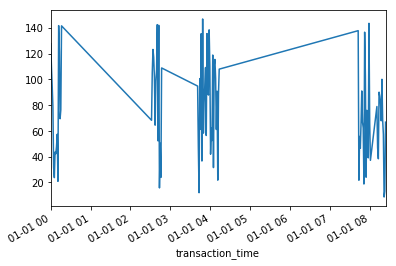

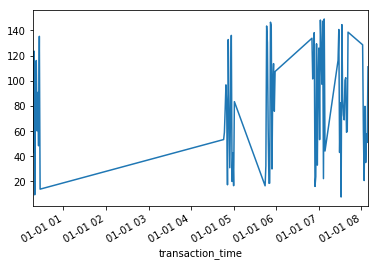

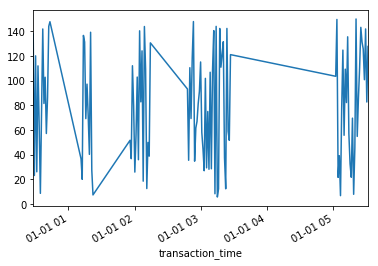

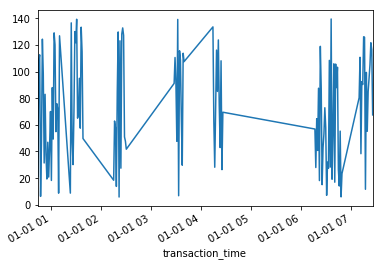

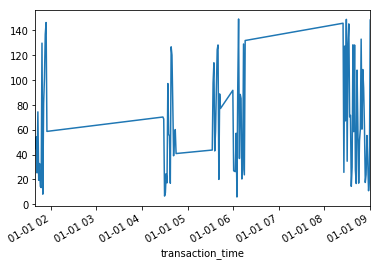

In [19]:
# let's plot the amount per transaction ==>
# one plot per customer
# this step is not in the book

for customer in data['customer_id'].unique():

    # make a small df with one customer
    tmp = data[data['customer_id'] == customer]

    # add the transaction time as index
    tmp.index = tmp['transaction_time']

    # plot the amount spent in time
    tmp['amount'].plot()
    plt.show()

In [20]:
# let's create a function that finds a plots
# the local maxima of a customer amount spent
# per transaction time series

# this function and following cell are not in the book

# x is a pandas series
def find_and_plot_peaks(x, customer):

    # find local maxima
    peaks, _ = find_peaks(x)

    # plot the peaks
    plt.figure(figsize=(4, 3))
    plt.plot(x.values)
    plt.plot(peaks, x.values[peaks], "x")
    plt.title('Customer number {}'.format(customer))
    plt.show()

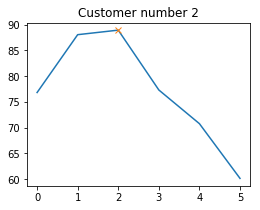

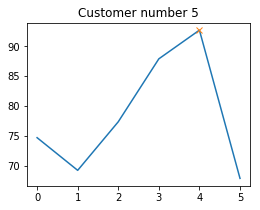

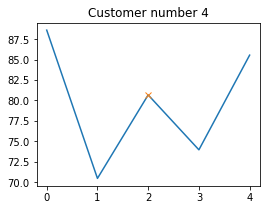

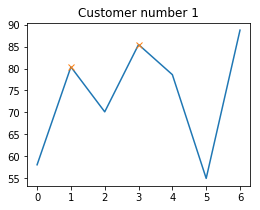

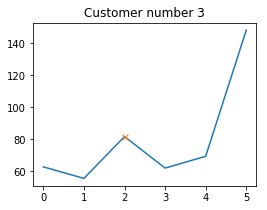

In [21]:
# now let's plot the local maxima for the time series with 
# the mean amount spent per hour ==>

# one plot per customer

# this code is intended to get the reader familiar with the data
# and therefore facilitate the understanding of the recipe code

for customer in data['customer_id'].unique():
    
    # small df with a single customer data
    tmp = data[data['customer_id']==customer]
    
    # aggregate the mean amount spent per hr
    tmp = tmp.groupby('hr')['amount'].mean()
    pd.DataFrame(tmp).reset_index(inplace=True, drop=False)
    
    # find and plot the local maxima
    find_and_plot_peaks(tmp, customer)


In [22]:
# create functions that take a time series
# and return number of local maxima or local minima


def find_no_peaks(x):
    peaks, _ = find_peaks(x)
    return len(peaks)


def find_no_valleys(x):
    valleys, _ = find_peaks(1/x)
    return len(valleys)

In [23]:
# select a single customer data to test function

tmp = data[data['customer_id'] == 3]
tmp = tmp.groupby('hr')['amount'].mean()
tmp

hr
1     62.791333
4     55.579412
5     81.747500
6     62.019333
8     69.403939
9    148.310000
Name: amount, dtype: float64

In [24]:
# test local maxima function

find_no_peaks(tmp)

1

In [25]:
# test local minima function

find_no_valleys(tmp)

2

In [26]:
# find number of local maxima in all customers

data.groupby(['customer_id', 'hr'])['amount'].mean().groupby(
    'customer_id').apply(find_no_peaks)

customer_id
1    2
2    1
3    1
4    1
5    1
Name: amount, dtype: int64

In [27]:
# find both local maxima and minima in all customers

data.groupby(['customer_id', 'hr'])['amount'].mean().groupby(
    'customer_id').agg([find_no_peaks, find_no_valleys])

,find_no_peaks,find_no_valleys
customer_id,,
1,2.0,2.0
2,1.0,0.0
3,1.0,2.0
4,1.0,2.0
5,1.0,1.0
